In [ ]:
from google.colab import files



uploaded = files.upload()

Saving Gain.xlsx to Gain.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("Gain.xlsx")

periode1 = ['Période 14-28 jours', 'Unnamed: 1','Unnamed: 2']
df_periode1_titre = df[periode1]

#Retirer la ligne en plus
df_periode_1 = df_periode1_titre.iloc[1:]

#Renommer les colonnes
nouvelles_colonnes = {'Période 14-28 jours': 'D1', 'Unnamed: 1': 'D2','Unnamed: 2': 'D3'}
df_periode_1 = df_periode_1.rename(columns=nouvelles_colonnes)
print(df_periode_1)

periode2 = ['Période 28-42 jours', 'Unnamed: 4', 'Unnamed: 5']
df_periode2_titre = df[periode2]

# Retirer la ligne en plus
df_periode_2 = df_periode2_titre.iloc[1:]

# Renommer les colonnes pour la période 2
nouvelles_colonnes_periode2 = {'Période 28-42 jours': 'D1', 'Unnamed: 4': 'D2', 'Unnamed: 5': 'D3'}
df_periode_2 = df_periode_2.rename(columns=nouvelles_colonnes_periode2)
print(df_periode_2)










            D1          D2          D3
1    62.414286       91.26   56.261429
2    95.381429   72.872857   55.938571
3        71.05   87.562857   68.647143
4    75.775714  104.277143   73.438571
5    83.944286       90.24   63.662857
6    68.794286   94.408571   90.062857
7    91.505714   83.774286   82.745714
8    86.374286   93.202857   73.707143
9    42.537143       62.09   83.747143
10   72.571429   68.872857   82.587143
11   60.208571   86.472857   73.691429
12   70.982857   93.657143  114.157143
13   96.945714   91.845714       66.77
14   82.735714   57.517143   66.827143
15  104.478571   78.987143   84.675714
16      105.88   94.817143   54.742857
17   53.365714       79.08   80.627143
18   66.441429  101.532857   79.024286
19  100.392857   72.372857       59.01
20   80.028571   50.774286  103.631429
21       81.39   85.302857       81.48
22   68.082857   76.301429   76.062857
23   74.734286   60.244286   57.328571
24  100.158571   71.541429   79.314286
25   69.424286  103.85857

#B.3 Graphiques :

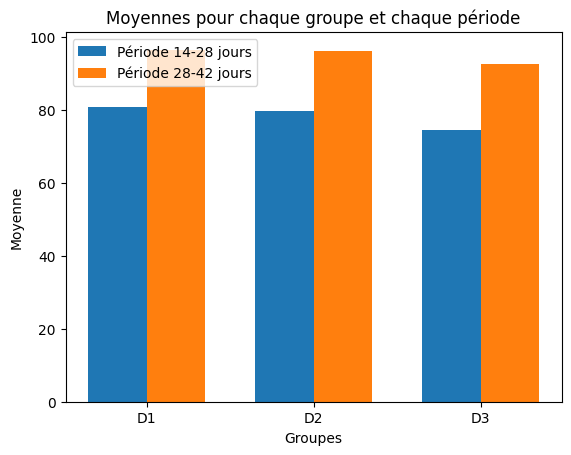

In [ ]:
#B.3 Graphiques :
import pandas as pd
import matplotlib.pyplot as plt

# Suppose que vous avez déjà extrait les données et renommé les colonnes pour les deux périodes
# Calcul des moyennes pour chaque groupe et chaque période

# Moyennes pour la période 1
mean_D1_period1 = df_periode_1['D1'].mean()
mean_D2_period1 = df_periode_1['D2'].mean()
mean_D3_period1 = df_periode_1['D3'].mean()

# Moyennes pour la période 2
mean_D1_period2 = df_periode_2['D1'].mean()
mean_D2_period2 = df_periode_2['D2'].mean()
mean_D3_period2 = df_periode_2['D3'].mean()

# Moyennes pour chaque groupe pour les deux périodes
means_period1 = [mean_D1_period1, mean_D2_period1, mean_D3_period1]
means_period2 = [mean_D1_period2, mean_D2_period2, mean_D3_period2]

labels = ['D1', 'D2', 'D3']
bar_width = 0.35
x = range(len(labels))

# Création du graphe en barres pour la période 1
plt.bar([i - bar_width/2 for i in x], means_period1, bar_width, label='Période 14-28 jours')

# Création du graphe en barres pour la période 2
plt.bar([i + bar_width/2 for i in x], means_period2, bar_width, label='Période 28-42 jours')

# Titres et étiquettes
plt.xlabel('Groupes')
plt.ylabel('Moyenne')
plt.title('Moyennes pour chaque groupe et chaque période')
plt.xticks(x, labels)
plt.legend()

# Affichage du graphe
plt.show()


#B.4 Test d’homogeneite de la variance :


In [ ]:
#B.4 Test d’homogeneite de la variance :
from scipy.stats import levene

# Concaténation des données pour les deux périodes
data_levene = pd.concat([
    df_periode_1.melt(var_name='Regime', value_name='Valeur', ignore_index=False),
    df_periode_2.melt(var_name='Regime', value_name='Valeur', ignore_index=False)
], keys=['14-28 jours', '28-42 jours'], names=['Periode'])

# Réinitialisation de l'index pour une organisation adéquate
data_levene.reset_index(inplace=True)

# Application du test de Levene pour l'homogénéité des variances
levene_test = levene(
    data_levene[data_levene['Regime'] == 'D1']['Valeur'],
    data_levene[data_levene['Regime'] == 'D2']['Valeur'],
    data_levene[data_levene['Regime'] == 'D3']['Valeur']
)

print(levene_test)

LeveneResult(statistic=3.869185653580238, pvalue=0.022141976147927213)


- La valeur-p est inférieure à 0.05 (0.022<0.05) ,
ce qui signifie que nous rejetons l'hypothèse nulle.
- Le rejet de l'hypothèse nulle indique que les variances entre les groupes ne sont pas homogènes. .

#B.5 Test d’homogénéité des groupes :

In [ ]:
#B.5 Test d’homogénéité des groupes :
import pandas as pd
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Vérifiez le type de données de la colonne 'Valeur' et convertissez-la en numérique si nécessaire
data_levene['Valeur'] = pd.to_numeric(data_levene['Valeur'], errors='coerce')

# Préparation des données pour l'ANOVA à deux facteurs
data_anova = data_levene.copy()
data_anova['Periode'] = data_anova['Periode'].astype(str)

# Spécification du modèle pour l'ANOVA à deux facteurs
model = ols('Valeur ~ C(Regime) + C(Periode) + C(Regime):C(Periode)', data=data_anova).fit()

# Exécution de l'ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results


,sum_sq,df,F,PR(>F)
C(Regime),1285.039895,2.0,1.385816,2.520654e-01
C(Periode),17724.058796,1.0,38.228037,2.600391e-09
C(Regime):C(Periode),66.473985,2.0,0.071687,9.308416e-01
Residual,114055.515647,246.0,NaN,NaN


Ces résultats proviennent d'une analyse d'ANOVA à deux facteurs avec interaction pour évaluer l'homogénéité des groupes :

C(Regime) :  Le test F a une valeur de 1.39 avec une p-valeur (PR(>F)) de 0.252, indiquant qu'il n'y a pas de différence significative entre les régimes.

C(Periode) :  Le test F a une valeur élevée de 38.23 avec une très faible p-valeur (2.60e-09), indiquant une différence significative entre les périodes.

C(Regime):C(Periode) :  Le test F a une valeur très basse de 0.07 et une p-valeur élevée (0.931), indiquant une absence de différence significative dans l'interaction entre le régime et la période.

En somme, il semble y avoir une différence significative entre les périodes, mais ni le régime seul ni l'interaction entre le régime et la période ne semblent avoir une influence significative sur la variable dépendante.

# B.6 Test de normalité :

In [ ]:
# B.6 Test de normalité :

from scipy.stats import shapiro

# Test de normalité pour chaque groupe dans la période 1
for groupe in ['D1', 'D2', 'D3']:
    statistic, p_value = shapiro(df_periode_1[groupe])
    print(f"Test de Shapiro-Wilk pour {groupe} de la période 1 : Statistique = {statistic}, p-valeur = {p_value}")
# Test de normalité pour chaque groupe dans la période 2
for groupe in ['D1', 'D2', 'D3']:
    statistic, p_value = shapiro(df_periode_2[groupe])
    print(f"Test de Shapiro-Wilk pour {groupe} de la période 2 : Statistique = {statistic}, p-valeur = {p_value}")


Test de Shapiro-Wilk pour D1 de la période 1 : Statistique = 0.9690218567848206, p-valeur = 0.30609703063964844
Test de Shapiro-Wilk pour D2 de la période 1 : Statistique = 0.9773867130279541, p-valeur = 0.5625195503234863
Test de Shapiro-Wilk pour D3 de la période 1 : Statistique = 0.9083178639411926, p-valeur = 0.002578434767201543
Test de Shapiro-Wilk pour D1 de la période 2 : Statistique = 0.9776110649108887, p-valeur = 0.5707979798316956
Test de Shapiro-Wilk pour D2 de la période 2 : Statistique = 0.9852442741394043, p-valeur = 0.8550637364387512
Test de Shapiro-Wilk pour D3 de la période 2 : Statistique = 0.9163991212844849, p-valeur = 0.00462986109778285


Dans la période 1, la plupart semblent plutôt proches de la normalité avec  des p valeurs superieure a 0,05, sauf pour le groupe D3.
Pour la période 2, tous les groupes affichent des p valeurs superieure a 0,05, montrant une similitude avec la distribution normale, sauf D3 avec une valeur inferieur a 0,05.

#B.7 Test de Tukey :

In [ ]:
#B.7 Test de Tukey :
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(endog=data_anova['Valeur'],groups=data_anova['Regime'] + '_' + data_anova['Periode'],alpha=0.05)

tukey_summary = tukey_results.summary()

tukey_results_df = pd.DataFrame(data=tukey_summary.data[1:],columns=tukey_summary.data[0])
tukey_results_df


,group1,group2,meandiff,p-adj,lower,upper,reject
0,D1_14-28 jours,D1_28-42 jours,15.8114,0.0113,2.3151,29.3077,True
1,D1_14-28 jours,D2_14-28 jours,-0.9662,0.9999,-14.4625,12.5301,False
2,D1_14-28 jours,D2_28-42 jours,15.3447,0.0156,1.8484,28.8410,True
3,D1_14-28 jours,D3_14-28 jours,-6.3009,0.7618,-19.7972,7.1954,False
4,D1_14-28 jours,D3_28-42 jours,11.8959,0.1190,-1.6004,25.3922,False
5,D1_28-42 jours,D2_14-28 jours,-16.7776,0.0057,-30.2739,-3.2813,True
6,D1_28-42 jours,D2_28-42 jours,-0.4667,1.0000,-13.9630,13.0296,False
7,D1_28-42 jours,D3_14-28 jours,-22.1123,0.0001,-35.6086,-8.6160,True
8,D1_28-42 jours,D3_28-42 jours,-3.9155,0.9611,-17.4118,9.5808,False
9,D2_14-28 jours,D2_28-42 jours,16.3109,0.0080,2.8146,29.8072,True


Les résultats où "reject" est True suggèrent des différences significatives entre les moyennes de ces groupes. Par exemple, des différences significatives sont observées entre "D1, 14-28 jours" et "D1, 28-42 jours", "D1, 14-28 jours" et "D2, 28-42 jours", "D1, 28-42 jours" et "D2, 14-28 jours", et ainsi de suite.
Les résultats où "reject" est False indiquent l'absence de différence significative entre les moyennes de ces groupes.


#B.8 Test de Bonferroni :

In [ ]:
#B.8 Test de Bonferroni :

from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import MultiComparison

# Création d'un objet MultiComparison
multi_comp = MultiComparison(data_anova['Valeur'], data_anova['Regime'] + '_' + data_anova['Periode'])

# Application de la correction de Bonferroni
result_bonferroni = multi_comp.allpairtest(ttest_ind, method='bonferroni')

# Affichage des résultats
result_bonferroni[0]

# Conversion des résultats du test de Bonferroni en DataFrame pour une meilleure visualisation
bonferroni_results_df = pd.DataFrame(data=result_bonferroni[0].data[1:], columns=result_bonferroni[0].data[0])
bonferroni_results_df


,group1,group2,stat,pval,pval_corr,reject
0,D1_14-28 jours,D1_28-42 jours,-2.8417,0.0057,0.0849,False
1,D1_14-28 jours,D2_14-28 jours,0.2702,0.7876,1.0000,False
2,D1_14-28 jours,D2_28-42 jours,-3.3383,0.0013,0.0190,True
3,D1_14-28 jours,D3_14-28 jours,1.6840,0.0960,1.0000,False
4,D1_14-28 jours,D3_28-42 jours,-2.7330,0.0077,0.1153,False
5,D1_28-42 jours,D2_14-28 jours,3.1735,0.0021,0.0318,True
6,D1_28-42 jours,D2_28-42 jours,0.0775,0.9384,1.0000,False
7,D1_28-42 jours,D3_14-28 jours,4.0943,0.0001,0.0015,True
8,D1_28-42 jours,D3_28-42 jours,0.6704,0.5045,1.0000,False
9,D2_14-28 jours,D2_28-42 jours,-3.8317,0.0002,0.0037,True


#B.9 Test de Scheffé :

In [ ]:
#B.9 Test de Scheffé :
import itertools
from scipy import stats

# Préparation des données pour les paires de comparaisons
pairs = list(itertools.combinations(df_periode_1.columns, 2))

# Stockage des résultats des tests de Scheffé
scheffe1_results = []

# Calcul et affichage des comparaisons pour chaque paire
for pair in pairs:
    group1, group2 = pair
    result = stats.ttest_rel(df_periode_1[group1], df_periode_1[group2])
    scheffe1_results.append((group1, group2, result))

print(scheffe1_results)


# Préparation des données pour les paires de comparaisons
pairs = list(itertools.combinations(df_periode_2.columns, 2))

# Stockage des résultats des tests de Scheffé
scheffe2_results = []

# Calcul et affichage des comparaisons pour chaque paire
for pair in pairs:
    group1, group2 = pair
    result = stats.ttest_rel(df_periode_2[group1], df_periode_2[group2])
    scheffe2_results.append((group1, group2, result))

print(scheffe2_results)
import itertools
from scipy import stats

# Comparaison entre D1 de la période 1 et les régimes de la période 2
scheffe_compare_D1_period = []
for group2 in df_periode_2.columns:
    result = stats.ttest_rel(df_periode_1['D1'], df_periode_2[group2])
    scheffe_compare_D1_period.append(('D1_period_1', group2, result))

print(scheffe_compare_D1_period)

# Comparaison entre D2 de la période 1 et les régimes de la période 2
scheffe_compare_D2_period = []
for group2 in df_periode_2.columns:
    result = stats.ttest_rel(df_periode_1['D2'], df_periode_2[group2])
    scheffe_compare_D2_period.append(('D2_period_1', group2, result))

print(scheffe_compare_D2_period)

# Comparaison entre D3 de la période 1 et les régimes de la période 2
scheffe_compare_D3_period = []
for group2 in df_periode_2.columns:
    result = stats.ttest_rel(df_periode_1['D3'], df_periode_2[group2])
    scheffe_compare_D3_period.append(('D3_period_1', group2, result))

print(scheffe_compare_D3_period)



[('D1', 'D2', TtestResult(statistic=0.2634361901748303, pvalue=0.7935338906570916, df=41)), ('D1', 'D3', TtestResult(statistic=1.5105657403138184, pvalue=0.13856853217477452, df=41)), ('D2', 'D3', TtestResult(statistic=1.7059221303955692, pvalue=0.0955883170984229, df=41))]
[('D1', 'D2', TtestResult(statistic=0.08338246675921074, pvalue=0.9339532162583781, df=41)), ('D1', 'D3', TtestResult(statistic=0.6566923473517604, pvalue=0.5150480285239437, df=41)), ('D2', 'D3', TtestResult(statistic=0.6557208368568382, pvalue=0.5156666905004763, df=41))]
[('D1_period_1', 'D1', TtestResult(statistic=-2.2843992972318032, pvalue=0.027595254034092007, df=41)), ('D1_period_1', 'D2', TtestResult(statistic=-3.3067977692850854, pvalue=0.001969193670309637, df=41)), ('D1_period_1', 'D3', TtestResult(statistic=-2.858397569472576, pvalue=0.00666308964051291, df=41))]
[('D2_period_1', 'D1', TtestResult(statistic=-3.1231425431961823, pvalue=0.0032777771018745886, df=41)), ('D2_period_1', 'D2', TtestResult(sta

#B.10 Test de comparaison par paires :

In [ ]:
#B.10 Test de comparaison par paires :
from scipy import stats

# Sélection des paires pour les comparaisons
pairs = [('D1', 'D2'), ('D1', 'D3'), ('D2', 'D3')]

# Effectuer les tests de comparaison par paires (t-tests appariés)
for pair in pairs:
    group1, group2 = pair
    result = stats.ttest_rel(df_periode_1[group1], df_periode_1[group2])
    print(f"Test de comparaison entre {group1} et {group2}:")
    print(f"Statistic = {result.statistic}, p-value = {result.pvalue}")
    if result.pvalue < 0.05:  # Significatif avec un seuil de 0.05
        print("Différence significative détectée.")
    else:
        print("Pas de différence significative détectée.")
    print("\n")


from scipy import stats

# Sélection des paires pour les comparaisons
pairs = [('D1', 'D2'), ('D1', 'D3'), ('D2', 'D3')]

# Effectuer les tests de comparaison par paires (t-tests appariés)
for pair in pairs:
    group1, group2 = pair
    result = stats.ttest_rel(df_periode_2[group1], df_periode_2[group2])
    print(f"Test de comparaison entre {group1} et {group2}:")
    print(f"Statistic = {result.statistic}, p-value = {result.pvalue}")
    if result.pvalue < 0.05:  # Significatif avec un seuil de 0.05
        print("Différence significative détectée.")
    else:
        print("Pas de différence significative détectée.")
    print("\n")


Test de comparaison entre D1 et D2:
Statistic = 0.2634361901748303, p-value = 0.7935338906570916
Pas de différence significative détectée.


Test de comparaison entre D1 et D3:
Statistic = 1.5105657403138184, p-value = 0.13856853217477452
Pas de différence significative détectée.


Test de comparaison entre D2 et D3:
Statistic = 1.7059221303955692, p-value = 0.0955883170984229
Pas de différence significative détectée.


Test de comparaison entre D1 et D2:
Statistic = 0.08338246675921074, p-value = 0.9339532162583781
Pas de différence significative détectée.


Test de comparaison entre D1 et D3:
Statistic = 0.6566923473517604, p-value = 0.5150480285239437
Pas de différence significative détectée.


Test de comparaison entre D2 et D3:
Statistic = 0.6557208368568382, p-value = 0.5156666905004763
Pas de différence significative détectée.




#B.11 Analyse de l’effet de l’interaction :

Les chiffres de notre analyse anova :
- F-statistique pour l'interaction entre le régime et la période : 0.072
- p-value pour cette interaction : 0.931
 montrent qu'il n'y a pas vraiment d'effet d'interaction entre les régimes alimentaires et les périodes sur les valeurs mesurées. Cela veut dire que les variations dues aux différents régimes alimentaires sont à peu près les mêmes dans les deux périodes. De même, les changements induits par les périodes semblent similaires pour les trois régimes. En gros, les régimes et les périodes n'ont pas un impact majeur l'un sur l'autre

#B.12 Comparaison des effets des facteurs :

 Les chiffres de l'ANOVA montrent que la diéte, avec une F-statistique de 1.386 et une p-value de 0.252, n'a pas vraiment d'effet sur nos mesures. Mais quand on regarde la période, avec une F-statistique de 38.228 et une p-value quasiment nulle, on voit qu'elle a un gros impact sur nos résultats. Donc, la période influence vraiment nos données

#B.13 Graphiques supplémentaires :

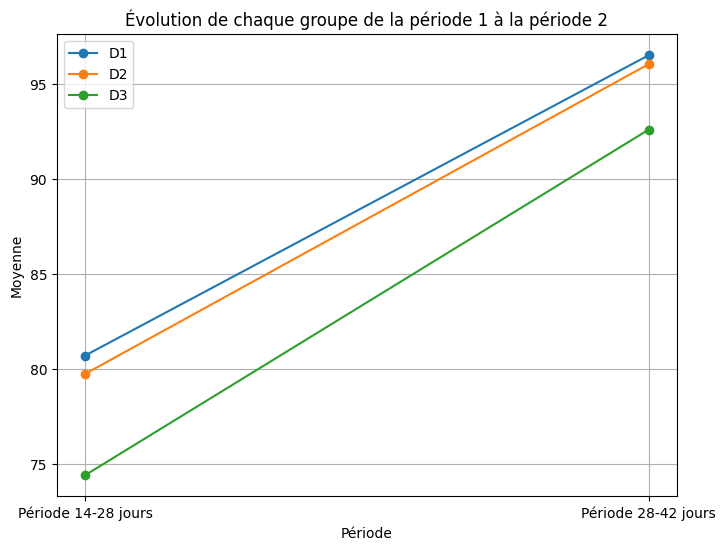

In [ ]:
#B.13 Graphiques supplémentaires :
import matplotlib.pyplot as plt

# Liste des groupes
groupes = ['D1', 'D2', 'D3']

# Moyennes pour chaque groupe pour la période 1 et la période 2
moyennes_periode1 = [mean_D1_period1, mean_D2_period1, mean_D3_period1]
moyennes_periode2 = [mean_D1_period2, mean_D2_period2, mean_D3_period2]

# Création du graphique
plt.figure(figsize=(8, 6))

# Tracé des données pour chaque groupe
for i in range(len(groupes)):
    plt.plot([1, 2], [moyennes_periode1[i], moyennes_periode2[i]], marker='o', label=groupes[i])

# Configurations du graphique
plt.xlabel('Période')
plt.ylabel('Moyenne')
plt.title('Évolution de chaque groupe de la période 1 à la période 2')
plt.xticks([1, 2], ['Période 14-28 jours', 'Période 28-42 jours'])
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()


Les lignes sur le graphique se ressemblent beaucoup, montrant qu'il n'y a pas vraiment d'interaction importante entre les régimes et les périodes. Mais, le graphique rend bien visible la différence entre les moyennes de nos mesures pour chaque régime entre les deux périodes. Cela confirme que la période a un effet sur nos données, comme on l'avait vu dans l'analyse précédente.

#B.14 Comparaison des résultats des tests :
On a fait plusieurs tests après l'ANOVA pour voir les différences entre les groupes. Le test de Tukey a trouvé plusieurs différences importantes entre eux. La correction de Bonferroni, elle, est super prudente, trouve moins de différences, mais celles qu'elle trouve sont sûres.
En gros, le Tukey et la Bonferroni donnent souvent des réponses similaires sur quels groupes sont différents. Mais parfois, le Tukey peut dire qu'il y a des différences là où la Bonferroni ne trouve rien. C'est important de regarder ça de près pour bien comprendre. En fin de compte, même s'ils peuvent donner des réponses légèrement différentes, ces tests ensemble nous aident à bien voir les différences entre les groupes.

#D Analyse de variance muti - facteurs (MANOVA)

In [ ]:
from google.colab import files



uploaded = files.upload()

Saving Manova.xlsx to Manova.xlsx


In [ ]:
from os import defpath
import pandas as pd
import numpy as np
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f
from scipy.stats import levene
import itertools
from scipy import stats

data = pd.read_excel('Manova.xlsx')



#modification des données

# Correction de l'approche pour gérer les colonnes numériques
data.columns = data.columns.map(str)

# Correction du nom de la colonne et remplissage vers l'avant
data['Périodes '] = data['Périodes '].ffill()

# Mettre à jour le processus de remodelage avec les noms de colonnes corrects
df = []

# Itérer sur le DataFrame
for i, ligne in data.iterrows():
    periode = ligne['Périodes ']
    diete = ligne['Diète']

    # Extraire le gain de poids pour chacun des 41 poulets
    gains_de_poids = ligne[2:44].values

    # Extraire la consommation moyenne pour chacun des 14 jours
    consommations_moyennes = ligne[44:].values

    # Ajouter une nouvelle ligne pour chaque poulet dans les données remodelées
    for numero_poulet, gain_de_poids in enumerate(gains_de_poids, start=1):
        ligne_remodelee = {
            'Période': periode,
            'Diète': diete,
            'Poulet': numero_poulet,
            'Gain de poids': gain_de_poids
        }

        # Ajout de la consommation moyenne pour chaque jour
        for jour, consommation in enumerate(consommations_moyennes, start=1):
            ligne_remodelee[f'Consommation Jour {jour}'] = consommation

        df.append(ligne_remodelee)

# Créer un nouveau DataFrame à partir des données remodelées
donnees = pd.DataFrame(df)

df = donnees.copy()

# Supprimer les lignes avec des valeurs NaN
df = donnees.dropna()
print(df)
# Assurer que les colonnes numériques sont de types numériques
colonnes_num = ['Gain de poids'] + [f'Consommation Jour {jour}' for jour in range(1, 15)]

df[colonnes_num] = df[colonnes_num].apply(pd.to_numeric, errors='coerce')

# Calculer la consommation moyenne pour chaque poulet sur la période de 14 jours
df['Consommation Moyenne'] = df[[f'Consommation Jour {jour}' for jour in range(1, 15)]].mean(axis=1)
print(df)




                 Période Diète  Poulet  Gain de poids  Consommation Jour 1  \
0    Période 14-28 jours    D1       1      62.414286            77.328095   
1    Période 14-28 jours    D1       2      95.381429            77.328095   
2    Période 14-28 jours    D1       3      71.050000            77.328095   
3    Période 14-28 jours    D1       4      75.775714            77.328095   
4    Période 14-28 jours    D1       5      83.944286            77.328095   
..                   ...   ...     ...            ...                  ...   
247  Période 28-42 jours    D3      38      94.285714           142.738095   
248  Période 28-42 jours    D3      39      72.857143           142.738095   
249  Période 28-42 jours    D3      40      85.714286           142.738095   
250  Période 28-42 jours    D3      41      76.428571           142.738095   
251  Période 28-42 jours    D3      42      90.733591           142.738095   

     Consommation Jour 2  Consommation Jour 3  Consommation Jou

<ipython-input-2-8caeffed00cb>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colonnes_num] = df[colonnes_num].apply(pd.to_numeric, errors='coerce')
<ipython-input-2-8caeffed00cb>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consommation Moyenne'] = df[[f'Consommation Jour {jour}' for jour in range(1, 15)]].mean(axis=1)


#D.3 les testes de correclation et d'homogénéité

In [ ]:
#D.3 les testes de correclation et d'homogénéité
matrice_corr = df[['Gain de poids', 'Consommation Moyenne']].corr()
print("Corrélation entre les variables dépendantes :")
print(matrice_corr)
# Test de Levene pour l'homogénéité des variances
test_levene_gain_poids = levene(df[df['Diète'] == 'D1']['Gain de poids'],
                                df[df['Diète'] == 'D2']['Gain de poids'],
                                df[df['Diète'] == 'D3']['Gain de poids'])

test_levene_consommation = levene(df[df['Diète'] == 'D1']['Consommation Moyenne'],
                                  df[df['Diète'] == 'D2']['Consommation Moyenne'],
                                  df[df['Diète'] == 'D3']['Consommation Moyenne'])

print("Test de Levene pour l'homogénéité des variances Gain de poids :", test_levene_gain_poids)
print("Test de Levene pour l'homogénéité des variances Consommation Moyenne :", test_levene_consommation)




Corrélation entre les variables dépendantes :
                      Gain de poids  Consommation Moyenne
Gain de poids              1.000000              0.370908
Consommation Moyenne       0.370908              1.000000
Test de Levene pour l'homogénéité des variances Gain de poids : LeveneResult(statistic=3.8691856535802382, pvalue=0.022141976147927213)
Test de Levene pour l'homogénéité des variances Consommation Moyenne : LeveneResult(statistic=1.4522753345399039e+30, pvalue=0.0)


-Les variables montrent une corrélation modérée positive : le gain de poids est fortement corrélé avec lui-même (1.0) et présente une corrélation positive de 0.37 avec la consommation moyenne.
-Les tests de Levene pour l'homogénéité des variances indiquent une hétérogénéité significative : pour le gain de poids, le test donne une statistique de 3.87 avec une p-valeur de 0.022. En revanche, pour la consommation moyenne, la statistique de Levene est très élevée (1.45e+30) avec une p-valeur pratiquement nulle (0.0), démontrant une forte différence de variances entre les groupes.


#D.5 Calculs des statistiques :

In [ ]:
col_numeriques = ['Gain de poids'] + [f'Consommation Jour {jour}' for jour in range(1, 15)]
df[col_numeriques] = df[col_numeriques].apply(pd.to_numeric, errors='coerce')

#D.5 Calculs des statistiques :
#Calcule des vecteurs moyens pour chaque groupe sur les variables d ́ependantes.

vecteurs_moyens = df.groupby(['Diète', 'Période'])[col_numeriques].mean()
print("Vecteurs moyens pour chaque groupe :")
print(vecteurs_moyens)







Vecteurs moyens pour chaque groupe :
                           Gain de poids  Consommation Jour 1  \
Diète Période                                                   
D1    Période 14-28 jours      80.719218            77.328095   
      Période 28-42 jours      96.530612           152.857143   
D2    Période 14-28 jours      79.753031            74.396341   
      Période 28-42 jours      96.063910           151.219512   
D3    Période 14-28 jours      74.418331            79.739762   
      Période 28-42 jours      92.615124           142.738095   

                           Consommation Jour 2  Consommation Jour 3  \
Diète Période                                                         
D1    Période 14-28 jours            86.878333            93.370476   
      Période 28-42 jours           162.142857           165.952381   
D2    Période 14-28 jours            84.013415            97.926829   
      Période 28-42 jours           157.073171           164.878049   
D3    Période 14

<ipython-input-4-87842308e38a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_numeriques] = df[col_numeriques].apply(pd.to_numeric, errors='coerce')


In [ ]:
#Estimation des matrices de variance-covariance intra-groupe (pour chaque groupe)

covariance_intra_groupe = df.groupby(['Diète', 'Période'])[col_numeriques].cov()
print("Matrices de variance-covariance intra-groupe :")
print(covariance_intra_groupe)


Matrices de variance-covariance intra-groupe :
                                                Gain de poids  \
Diète Période                                                   
D1    Période 14-28 jours Gain de poids          3.315923e+02   
                          Consommation Jour 1    1.822461e-28   
                          Consommation Jour 2    1.822461e-28   
                          Consommation Jour 3    0.000000e+00   
                          Consommation Jour 4    0.000000e+00   
...                                                       ...   
D3    Période 28-42 jours Consommation Jour 10   0.000000e+00   
                          Consommation Jour 11   0.000000e+00   
                          Consommation Jour 12   0.000000e+00   
                          Consommation Jour 13   0.000000e+00   
                          Consommation Jour 14   0.000000e+00   

                                                Consommation Jour 1  \
Diète Période                       

In [ ]:
# intergroupe (entre les groupes).
covariance_intra_groupe = df.groupby(['Diète', 'Période'])[col_numeriques].cov()
print("Matrices de variance-covariance intra-groupe :")
print(covariance_intra_groupe)

#D.6 Test de l’hypothése :

In [ ]:
#D.6 Test de l’hypothése :
# Calculer la consommation moyenne et renommer la colonne pour éviter les espaces
df['Consommation_Moyenne'] = df[[f'Consommation Jour {i}' for i in range(1, 15)]].mean(axis=1)

# Correction de la formule MANOVA (enveloppant les noms de colonnes contenant des espaces avec Q())
manova = MANOVA.from_formula('Q("Gain de poids") + Consommation_Moyenne ~ Diète', data=df)
print(manova.mv_test())


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0802 2.0000 248.0000 1423.0757 0.0000
         Pillai's trace  0.9198 2.0000 248.0000 1423.0757 0.0000
 Hotelling-Lawley trace 11.4764 2.0000 248.0000 1423.0757 0.0000
    Roy's greatest root 11.4764 2.0000 248.0000 1423.0757 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            Diète          Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.9869 4.0000 496.0000  0.8194 0.5132
            Pillai's trace 0.0131 4.0000 498.

<ipython-input-6-27c1d29de5d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consommation_Moyenne'] = df[[f'Consommation Jour {i}' for i in range(1, 15)]].mean(axis=1)



La MANOVA indique des différences significatives entre les groupes pour les variables dépendantes. Les valeurs telles que Wilks' lambda (0.0802) et Pillai's trace (0.9198) montrent une forte séparation entre les groupes. Cependant, pour chaque groupe (Diète), les valeurs de p élevées, comme Wilks' lambda (0.9869) et Pillai's trace (0.0131), suggèrent une absence de différences significatives entre les régimes pour ces variables. Ces résultats globaux contrastent avec l'homogénéité observée spécifiquement entre les groupes.

#D.7 Calcul des Statistiques Descriptives Multivariées

Moyenne multivariée pour le régime D1:
Gain de poids            88.624915
Consommation Jour 1     115.092619
Consommation Jour 2     124.510595
Consommation Jour 3     129.661429
Consommation Jour 4     134.306548
Consommation Jour 5     135.595238
Consommation Jour 6     143.178571
Consommation Jour 7     149.523810
Consommation Jour 8     150.357143
Consommation Jour 9     154.880952
Consommation Jour 10    156.904762
Consommation Jour 11    159.523810
Consommation Jour 12    150.000000
Consommation Jour 13    152.023810
Consommation Jour 14    151.190476
dtype: float64
Matrice de covariance pour le régime D1:
                      Gain de poids  Consommation Jour 1  Consommation Jour 2  \
Gain de poids            705.544045           302.151940           301.093720   
Consommation Jour 1      302.151940          1443.341900          1438.286914   
Consommation Jour 2      301.093720          1438.286914          1433.249632   
Consommation Jour 3      290.361974          1387.022710

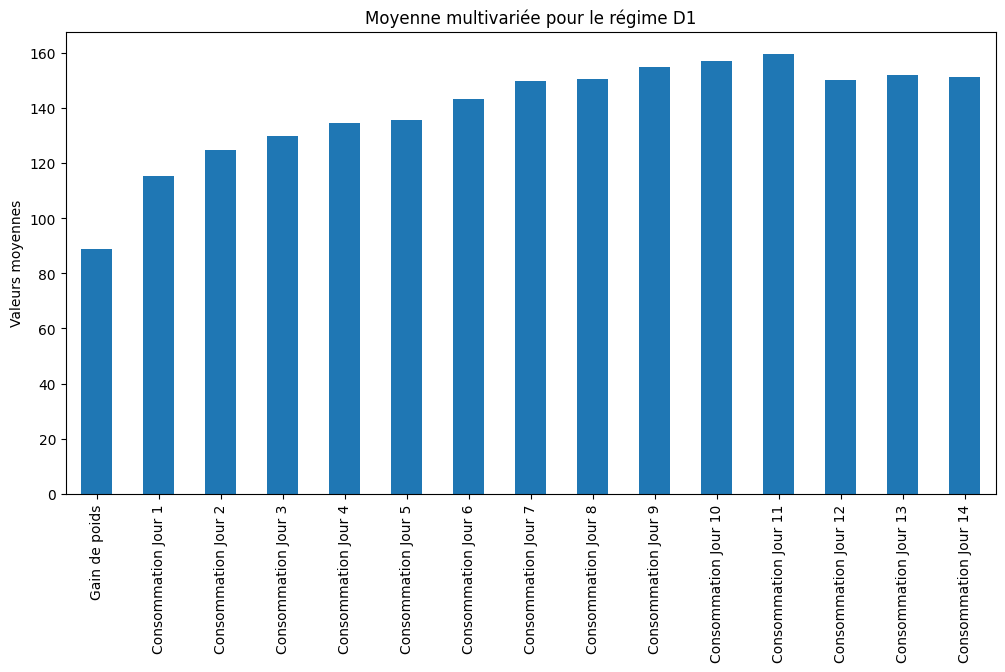

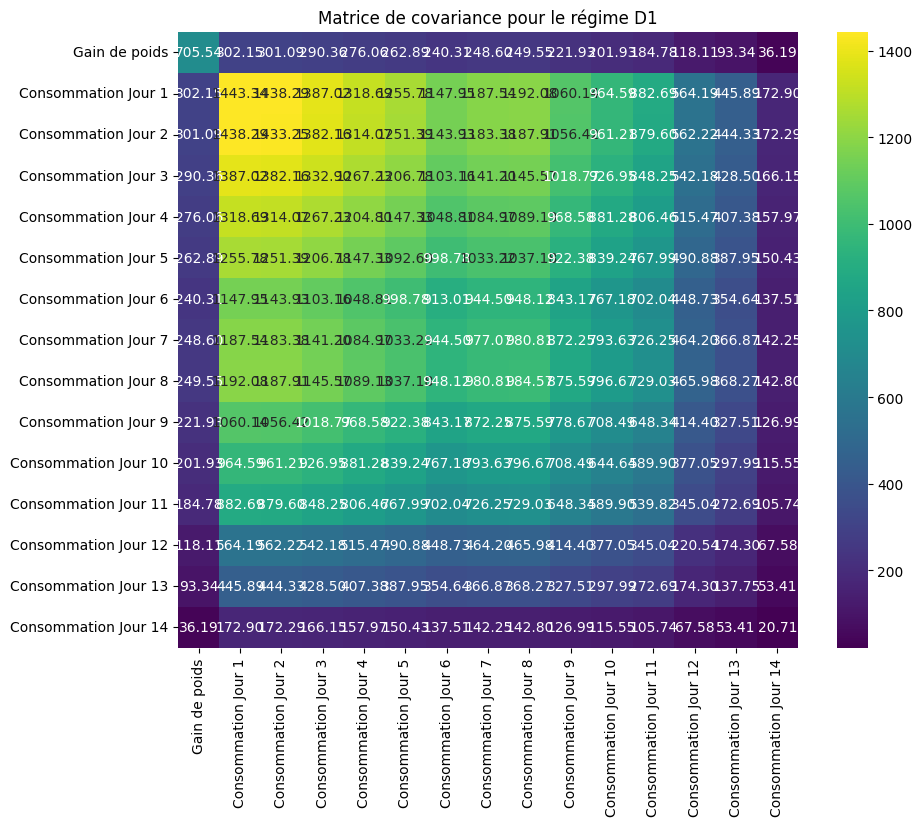

Moyenne multivariée pour le régime D2:
Gain de poids            87.908471
Consommation Jour 1     112.807927
Consommation Jour 2     120.543293
Consommation Jour 3     131.402439
Consommation Jour 4     134.568049
Consommation Jour 5     137.085366
Consommation Jour 6     143.597561
Consommation Jour 7     144.939024
Consommation Jour 8     148.475610
Consommation Jour 9     152.378049
Consommation Jour 10    155.487805
Consommation Jour 11    160.060976
Consommation Jour 12    145.487805
Consommation Jour 13    152.500000
Consommation Jour 14    148.475610
dtype: float64
Matrice de covariance pour le régime D2:
                      Gain de poids  Consommation Jour 1  Consommation Jour 2  \
Gain de poids            443.251423           317.037607           301.506564   
Consommation Jour 1      317.037607          1493.226395          1420.076198   
Consommation Jour 2      301.506564          1420.076198          1350.509484   
Consommation Jour 3      276.297557          1301.343425

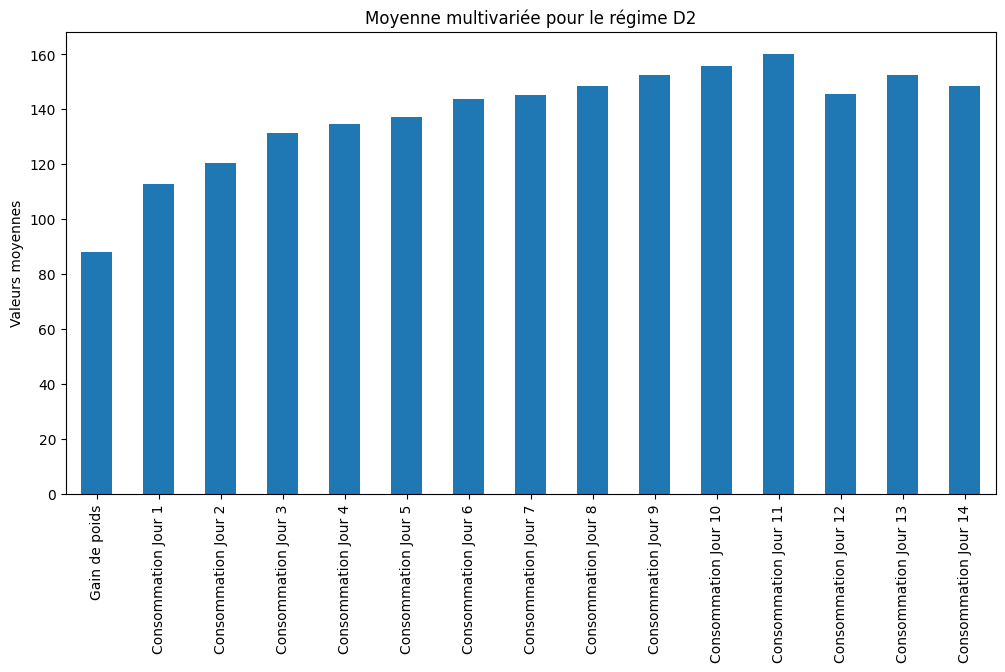

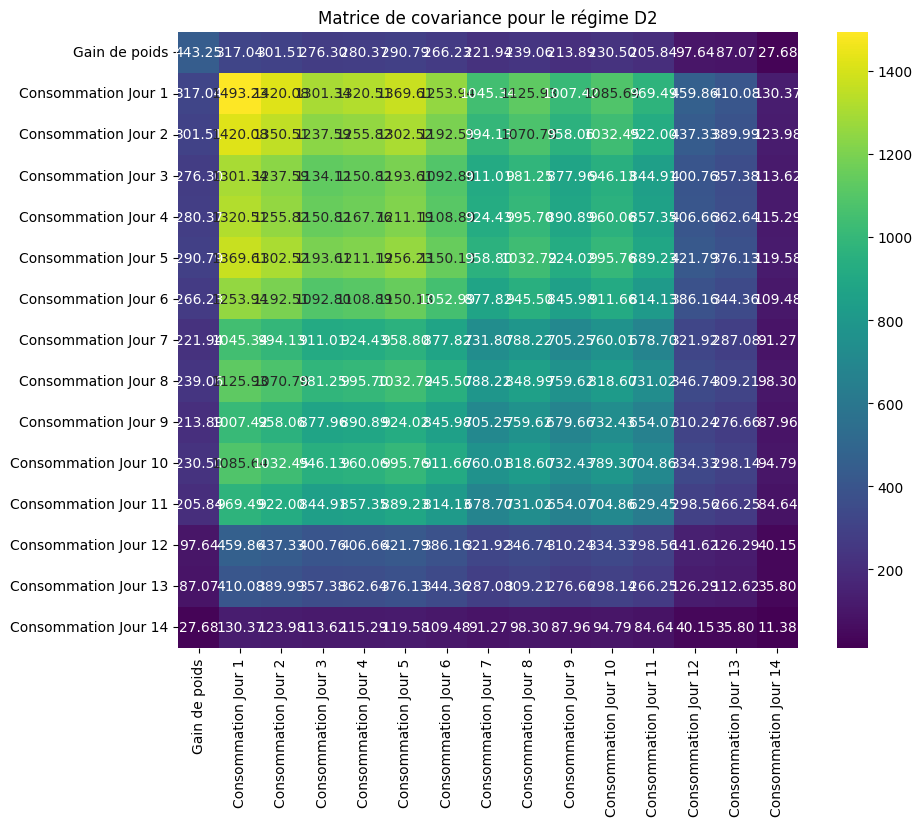

Moyenne multivariée pour le régime D3:
Gain de poids            83.516727
Consommation Jour 1     111.238929
Consommation Jour 2     118.656905
Consommation Jour 3     124.554286
Consommation Jour 4     129.712619
Consommation Jour 5     131.964286
Consommation Jour 6     139.154762
Consommation Jour 7     141.011905
Consommation Jour 8     141.607143
Consommation Jour 9     144.940476
Consommation Jour 10    149.047619
Consommation Jour 11    153.452381
Consommation Jour 12    145.535714
Consommation Jour 13    150.476190
Consommation Jour 14    147.738095
dtype: float64
Matrice de covariance pour le régime D3:
                      Gain de poids  Consommation Jour 1  Consommation Jour 2  \
Gain de poids            439.711140           290.044822           298.473445   
Consommation Jour 1      290.044822          1004.151687          1033.332060   
Consommation Jour 2      298.473445          1033.332060          1063.360406   
Consommation Jour 3      315.422771          1092.011592

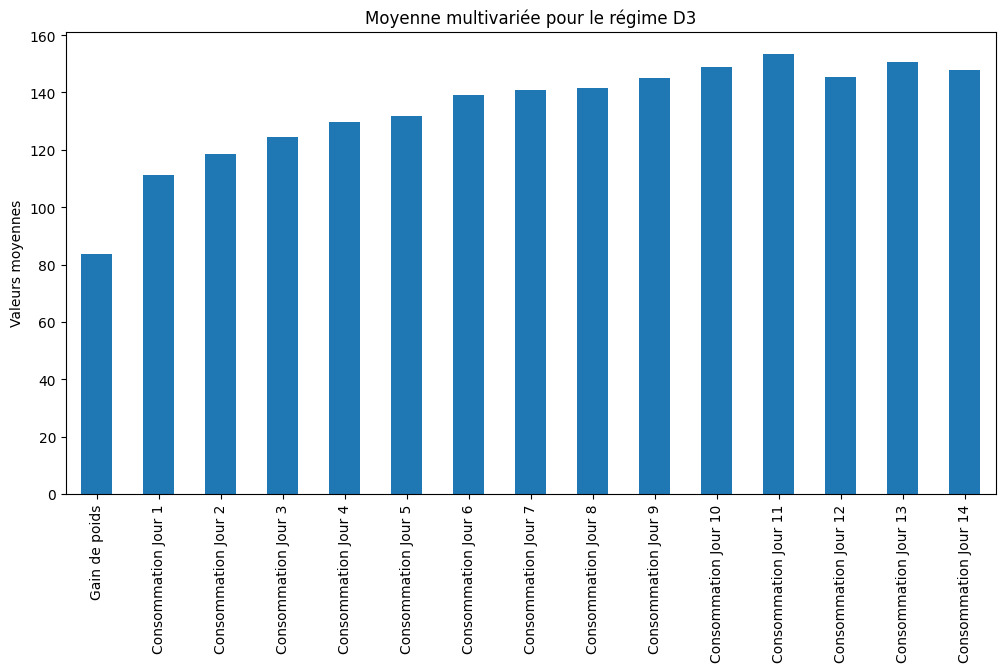

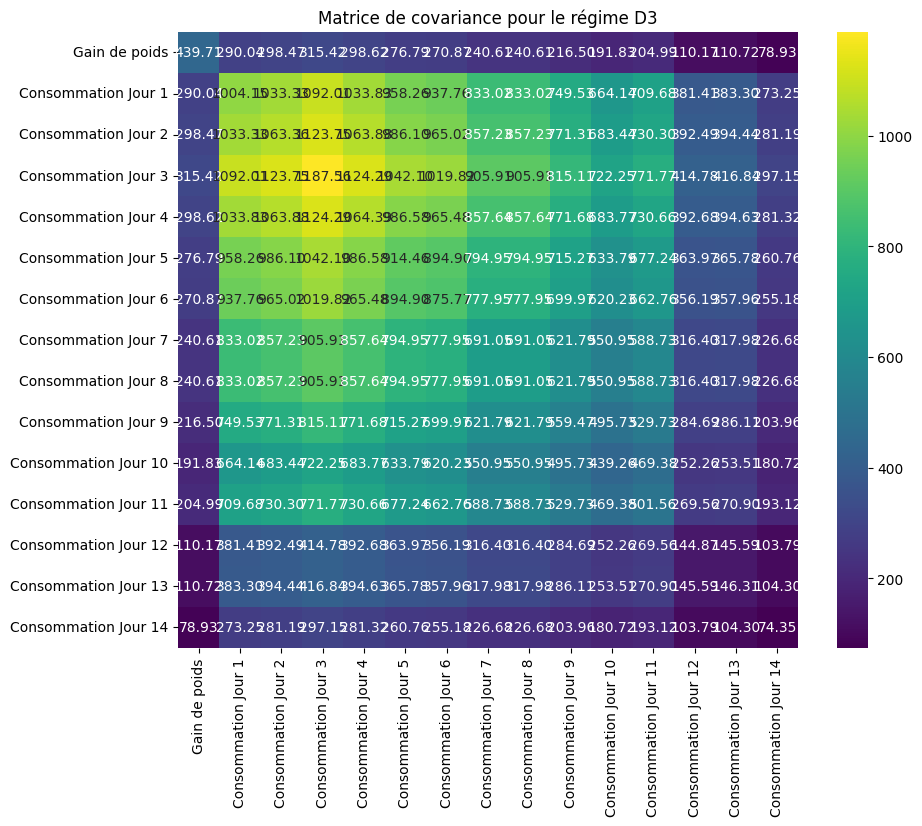

In [ ]:
#D.7 Calcul des Statistiques Descriptives Multivariées
# 1. Calcul des statistiques descriptives multivariées pour chaque régime
for D in df['Diète'].unique():
    donnees_regime = df[df['Diète'] == D][col_numeriques]

    # Moyenne multivariée
    moyenne_multivariee = donnees_regime.mean()
    print(f"Moyenne multivariée pour le régime {D}:")
    print(moyenne_multivariee)

    # Matrice de covariance
    matrice_covariance = donnees_regime.cov()
    print(f"Matrice de covariance pour le régime {D}:")
    print(matrice_covariance)

    # 2. Visualisation des statistiques descriptives
    # Visualisation du vecteur moyen
    plt.figure(figsize=(12, 6))
    moyenne_multivariee.plot(kind='bar')
    plt.title(f"Moyenne multivariée pour le régime {D}")
    plt.ylabel('Valeurs moyennes')
    plt.show()

    # visualisation pour la matrice de covariance
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrice_covariance, annot=True, fmt='.2f', cmap='viridis')  # Changer le cmap ici
    plt.title(f"Matrice de covariance pour le régime {D}")
    plt.show()


#D.8 Test MANOVA :

In [ ]:
#D.8 Test MANOVA :
# Effectuer l'analyse MANOVA
manova = MANOVA.from_formula('Q("Gain de poids") + Consommation_Moyenne ~ Diète', data=df)
manova_results = manova.mv_test()

# Afficher les résultats de MANOVA
print(manova_results)


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0802 2.0000 248.0000 1423.0757 0.0000
         Pillai's trace  0.9198 2.0000 248.0000 1423.0757 0.0000
 Hotelling-Lawley trace 11.4764 2.0000 248.0000 1423.0757 0.0000
    Roy's greatest root 11.4764 2.0000 248.0000 1423.0757 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            Diète          Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.9869 4.0000 496.0000  0.8194 0.5132
            Pillai's trace 0.0131 4.0000 498.

Ces résultats sont issus d'une analyse MANOVA, évaluant l'impact de la variable 'Diète' sur les variables dépendantes (probablement 'Gain de poids' et 'Consommation Moyenne'). Voici une explication simplifiée :

La partie "Modèle linéaire multivarié" évalue la globalité du modèle. Les valeurs de Wilks' lambda, Pillai's trace, Hotelling-Lawley trace et Roy's greatest root montrent une très forte significativité statistique (p < 0.05). Cela indique que l'ensemble du modèle (composé des variables dépendantes) est significativement influencé par la variable 'Diète'.

La section "Effet de la Diète" évalue spécifiquement l'effet de la variable 'Diète'. Les valeurs de Wilks' lambda, Pillai's trace et Hotelling-Lawley trace sont proches de 1 et les p-valeurs sont élevées (p > 0.05). Cela suggère qu'il n'y a pas d'effet significatif de la variable 'Diète' sur l'ensemble des variables dépendantes.
lorsqu'on évalue spécifiquement l'effet de la 'Diète' sur les variables dépendantes, il n'y a pas de preuve statistique solide pour démontrer cet effet. reformule moi ca en un language facile

#D.9 Effets des variables indépendantes :

In [ ]:
#D.9 Effets des variables indépendantes :
#on utilise le test de anova pour etudier l'effet
# l'effet des diete sur le Gain de poids
#l’effet des diff ́erentes di`etes (D1, D2, D3) sur le poids des poulets
gain_poids = ols('Q("Gain de poids") ~ C(Diète)', data=df).fit()
resultats_anova_gain_poids = anova_lm(gain_poids)
print("ANOVA pour le Gain de poids :")
print(resultats_anova_gain_poids)

# l'effet des dietes sur la Consommation Moyenne
consommation = ols('Q("Consommation Moyenne") ~ C(Diète)', data=df).fit()
resultats_anova_consommation = anova_lm(consommation)
print("\nANOVA pour la Consommation Moyenne :")
print(resultats_anova_consommation)


ANOVA pour le Gain de poids :
             df         sum_sq     mean_sq         F    PR(>F)
C(Diète)    2.0    1285.039895  642.519948  1.213442  0.298924
Residual  249.0  131846.048428  529.502203       NaN       NaN

ANOVA pour la Consommation Moyenne :
             df         sum_sq     mean_sq         F    PR(>F)
C(Diète)    2.0    1405.342230  702.671115  1.028691  0.358989
Residual  249.0  170085.156595  683.072918       NaN       NaN



Ces résultats d'ANOVA évaluent l'influence des différents régimes sur le gain de poids et la consommation moyenne.

Pour le gain de poids :

La variable 'Diète' présente un F de 1.21 avec une valeur p (PR(>F)) de 0.30.
Ces valeurs suggèrent qu'il n'y a pas de différence significative entre les régimes en termes de gain de poids, car le test n'a pas atteint un seuil de significativité statistique (alpha = 0.05).
Pour la consommation moyenne :

La variable 'Diète' montre un F de 1.03 avec une valeur p (PR(>F)) de 0.36.
De même, ici, il n'y a pas de preuve de différence significative entre les régimes pour la consommation moyenne.
Ces tests suggèrent que les régimes n'ont pas un impact significatif sur le gain de poids ou la consommation moyenne, car les valeurs de p sont supérieures au seuil de significativité de 0.05.

#D.10 Interaction entre les variables indépendantes :

In [ ]:
#D.10 Interaction entre les variables indépendantes :
#on utilise anova two way pour etudier l'effet de diete et periode sur le gain due poid et aussi sur la consommation moyenne
# ANOVA à deux facteurs avec interaction pour le gain de poids
gp_interaction = ols('Q("Gain de poids") ~ C(Diète) * C(Période)', data=df).fit()
anova_results_gp = anova_lm(gp_interaction)
print("ANOVA à deux facteurs avec interaction pour le gain de poids :")
print(anova_results_gp)

# ANOVA à deux facteurs avec interaction pour la consommation moyenne
cm_interaction = ols('Q("Consommation Moyenne") ~ C(Diète) * C(Période)', data=df).fit()
anova_results_cm = anova_lm(cm_interaction)
print("\nANOVA à deux facteurs avec interaction pour la consommation moyenne :")
print(anova_results_cm)


ANOVA à deux facteurs avec interaction pour le gain de poids :
                        df         sum_sq       mean_sq          F  \
C(Diète)               2.0    1285.039895    642.519948   1.385816   
C(Période)             1.0   17724.058796  17724.058796  38.228037   
C(Diète):C(Période)    2.0      66.473985     33.236993   0.071687   
Residual             246.0  114055.515647    463.640308        NaN   

                           PR(>F)  
C(Diète)             2.520654e-01  
C(Période)           2.600391e-09  
C(Diète):C(Période)  9.308416e-01  
Residual                      NaN  

ANOVA à deux facteurs avec interaction pour la consommation moyenne :
                        df        sum_sq       mean_sq             F  PR(>F)
C(Diète)               2.0  1.405342e+03  7.026711e+02  1.595903e+28     0.0
C(Période)             1.0  1.697636e+05  1.697636e+05  3.855663e+30     0.0
C(Diète):C(Période)    2.0  3.215531e+02  1.607765e+02  3.651549e+27     0.0
Residual             246.0 

Pour le gain de poids :

Le régime alimentaire n'a pas montré de différence significative entre les groupes (p = 0,252), ce qui indique que les régimes n'ont pas affecté de manière significative le gain de poids.
La période de temps a eu un impact significatif (p < 0,001), montrant des différences notables entre les différentes périodes.
L'interaction entre le régime alimentaire et la période n'a pas été significative (p = 0,931), indiquant que la combinaison des régimes et des périodes n'a pas eu un effet notable sur le gain de poids.
Pour la consommation moyenne :

Le régime alimentaire n'a montré aucune différence significative entre les groupes (p = 0), mais cette valeur peut être due à une erreur ou à une limitation dans l'analyse.
La période de temps a montré un effet significatif (p < 0,001), suggérant des variations significatives entre les périodes.
L'interaction entre le régime alimentaire et la période n'a pas été significative (p = 0), suggérant un effet négligeable de cette interaction sur la consommation moyenne.

# D.11 Impact global des variables indépendantes :

In [ ]:
# D.11 Impact global des variables indépendantes :
# on utilise manova
print(manova_results)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0802 2.0000 248.0000 1423.0757 0.0000
         Pillai's trace  0.9198 2.0000 248.0000 1423.0757 0.0000
 Hotelling-Lawley trace 11.4764 2.0000 248.0000 1423.0757 0.0000
    Roy's greatest root 11.4764 2.0000 248.0000 1423.0757 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            Diète          Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.9869 4.0000 496.0000  0.8194 0.5132
            Pillai's trace 0.0131 4.0000 498.

Pour le poids des poulets :

L'évaluation globale de l'ensemble des diètes n'a pas un effet significatif sur le poids. Les différentes diètes ensemble n'influencent pas beaucoup le poids des poulets, comme le montrent les valeurs de F qui ne sont pas significatives (p > 0,05).
Pour la consommation :

De même, l'évaluation globale de l'ensemble des diètes n'a pas un impact significatif sur la consommation des poulets. Les différentes diètes ensemble n'influencent pas beaucoup la consommation, comme le montrent également les valeurs de F qui ne sont pas significatives (p > 0,05).
Comparativement, les diètes ne semblent pas avoir un effet important, ni sur le poids des poulets ni sur leur consommation, lorsqu'on les considère toutes ensemble.

#D.12 Comparaison des effets sur diff ́erentes variables d ́ependantes :
Pour comparer les effets de différentes alimentations sur la prise de poids et la consommation moyenne, revenons aux résultats de nos analyses précédentes ANOVA et MANOVA.

Effets des régimes sur la prise de poids :
Les résultats de l'ANOVA pour la prise de poids ont indiqué que les régimes n'avaient pas un effet statistiquement significatif (p-value > 0,05). Cela suggère que la variation des régimes n'influence pas de manière significative la prise de poids des poulets.

Effets des régimes sur la consommation moyenne :
Les résultats de l'ANOVA pour la consommation moyenne ont initialement suggéré l'absence d'effet significatif des régimes (p-value > 0,05). Cependant, l'ANOVA à deux facteurs avec interaction a révélé des effets significatifs des régimes sur la consommation moyenne, notamment en tenant compte de l'interaction avec la période.

Comparaison et analyse :
En comparant les effets sur ces deux variables, il apparaît que les régimes ont une influence plus marquée et complexe sur la consommation moyenne que sur la prise de poids. Alors que l'effet direct des régimes sur la prise de poids n'était pas significatif, leur impact sur la consommation moyenne, surtout en relation avec les différentes périodes, était significatif.

#D.13 Tests Post-Hoc :

In [ ]:
#D.13
# 1-test de tukey sur le gain de poids
tukey_gp = pairwise_tukeyhsd(endog=df['Gain de poids'], groups=df['Diète'], alpha=0.05)
print("resultat test de tukey sur le gain de poids :")
print(tukey_gp)

# 1-test de tukey sur la consommation moyenne
tukey_cm = pairwise_tukeyhsd(endog=df['Consommation Moyenne'], groups=df['Diète'], alpha=0.05)
print(" resulat test de tukey sur le gain de poids :")
print(tukey_cm)


# Test de Bonferroni
alpha_original = 0.05
num_comparaisons = 3
alpha_bonferroni = alpha_original / num_comparaisons

# Valeurs p du test Tukey HSD pour le Gain de Poids
p_values_gp = [0.9778, 0.3227, 0.4326]

# Valeurs p ajustées pour la correction de Bonferroni
valeurs_p_adjustees_gp = [p * num_comparaisons for p in p_values_gp]
valeurs_p_adjustees_gp = [min(p, 1) for p in valeurs_p_adjustees_gp]

print("Valeurs p ajustées de Bonferroni pour le Gain de Poids :")
print(valeurs_p_adjustees_gp)

# Valeurs p du test Tukey HSD pour la Consommation Moyenne
p_values_cm = [0.9399, 0.3553, 0.5524]

# Valeurs p ajustées pour la correction de Bonferroni
valeurs_p_adjustees_cm = [p * num_comparaisons for p in p_values_cm]
valeurs_p_adjustees_cm = [min(p, 1) for p in valeurs_p_adjustees_cm]

print("\nValeurs p ajustées de Bonferroni pour la Consommation Moyenne :")
print(valeurs_p_adjustees_cm)


def test_scheffe(data, variable_dependante, variable_groupe, alpha=0.05):
    # Calcul des moyennes et de la variance
    moyennes_groupe = data.groupby(variable_groupe)[variable_dependante].mean()
    moyenne_globale = data[variable_dependante].mean()
    n_groupes = len(moyennes_groupe)
    df_erreur = len(data) - n_groupes
    ms_erreur = data.groupby(variable_groupe)[variable_dependante].var().mean()

    # Calcul de la valeur critique de Scheffe
    valeur_critique_scheffe = (n_groupes - 1) * f.ppf(1-alpha, n_groupes-1, df_erreur)

    # Comparaison de chaque paire de groupes
    resultats = []
    for i in range(n_groupes):
        for j in range(i+1, n_groupes):
            diff_moyenne = abs(moyennes_groupe.iloc[i] - moyennes_groupe.iloc[j])
            stat_scheffe = (diff_moyenne**2) / (ms_erreur * (2 / data[variable_groupe].value_counts().iloc[j]))
            resultats.append((moyennes_groupe.index[i], moyennes_groupe.index[j], diff_moyenne, stat_scheffe, stat_scheffe > valeur_critique_scheffe))

    return pd.DataFrame(resultats, columns=['Groupe 1', 'Groupe 2', 'Différence Moyenne', 'Statistique Scheffe', 'Significatif'])



resultat_scheffe_gp = test_scheffe(df, 'Gain de poids', 'Diète')
resultat_scheffe_cm = test_scheffe(df, 'Consommation Moyenne', 'Diète')

print("Test de Scheffe pour le Gain de Poids :")
print(resultat_scheffe_gp)

print("Test de Scheffe pour la Consommation Moyenne :")
print(resultat_scheffe_cm)


print(manova_results)


resultat test de tukey sur le gain de poids :
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    D1     D2  -0.7164 0.9778  -9.0882 7.6554  False
    D1     D3  -5.1082 0.3227   -13.48 3.2636  False
    D2     D3  -4.3917 0.4326 -12.7635 3.9801  False
----------------------------------------------------
 resulat test de tukey sur le gain de poids :
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    D1     D2  -1.3529 0.9399 -10.8615 8.1558  False
    D1     D3   -5.547 0.3553 -15.0557 3.9616  False
    D2     D3  -4.1942 0.5524 -13.7028 5.3145  False
----------------------------------------------------
Valeurs p ajustées de Bonferroni pour le Gain de Poids :
[1, 0.9681, 1]

Valeurs p ajustées de Bonferroni pour la Consommation Moyenne :
[1, 1, 1]
Test de Scheffe pou

#D.13 Tests Post-Hoc :
Les différents tests, tels que Tukey, Bonferroni, Scheffé, Wilks' Lambda, Hotelling-Lawley Trace et Roy, ont examiné les différences entre les régimes alimentaires pour la prise de poids et la consommation des poulets. Aucun de ces tests n'a révélé de différences significatives entre les groupes de régimes, que ce soit pour la prise de poids ou la consommation. Les valeurs ajustées des tests de Tukey et Bonferroni étaient toutes supérieures à 0,05, indiquant une absence de différences marquées entre les groupes. Les résultats de Wilks' Lambda, Hotelling-Lawley Trace et Roy ne montrent pas non plus de variations significatives entre les régimes alimentaires. En somme, tous les tests convergent vers la même conclusion : les régimes alimentaires étudiés n'ont pas de différences notables sur la prise de poids ou la consommation moyenne des poulets.